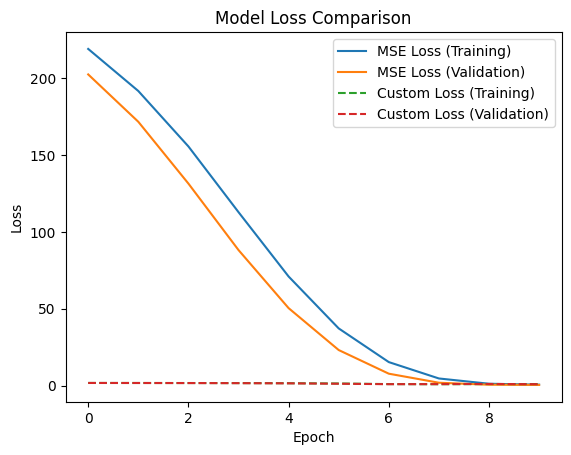

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = 3 * X.sum(axis=1) + np.random.randn(1000) * 0.5  # A linear function with some noise

# Split the data into training and validation sets
X_train, X_val = X[:800], X[800:]
y_train, y_val = y[:800], y[800:]

# Define a simple model
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dense(1)
    ])
    return model

# Original model with MeanSquaredError
model_mse = create_model()
model_mse.compile(optimizer='adam', loss='mean_squared_error')

# Custom loss function model with exponent 3
def custom_loss(y_true, y_pred, exponent=1/5):
    diff = tf.abs(y_true - y_pred)
    powered_diff = tf.pow(diff, exponent)
    return tf.reduce_mean(powered_diff)

model_custom = create_model()
model_custom.compile(optimizer='adam', loss=lambda y_true, y_pred: custom_loss(y_true, y_pred, exponent=1/5))

# Train the model with MeanSquaredError
history_mse = model_mse.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=0)

# Train the model with the custom loss function
history_custom = model_custom.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=0)

# Plot training & validation loss values
plt.plot(history_mse.history['loss'], label='MSE Loss (Training)')
plt.plot(history_mse.history['val_loss'], label='MSE Loss (Validation)')
plt.plot(history_custom.history['loss'], label='Custom Loss (Training)', linestyle='--')
plt.plot(history_custom.history['val_loss'], label='Custom Loss (Validation)', linestyle='--')
plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
